## Vietnam's Economic Growth Outlook


## Data description:
We collect the GDP growth data and the factors that affect economic growth in Vietnam from 1996 to 2023. The time series data are collected from World Bank database:
- **FDI inflows**: Foreign direct investment are the net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor. It is the sum of equity capital, reinvestment of earnings, other long-term capital, and short-term capital as shown in the balance of payments. This series shows net inflows (new investment inflows less disinvestment) in the reporting economy from foreign investors, and is divided by GDP.
- **Exports of goods and services (BoP, current US$)**: Exports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from residents to nonresidents of general merchandise, net exports of goods under merchanting, nonmonetary gold, and services. Data are in current U.S. dollars. 
- **Gross fixed capital formation (constant 2015 US$)**: Gross fixed capital formation (formerly gross domestic fixed investment) includes land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. According to the 2008 SNA, net acquisitions of valuables are also considered capital forma
- **Gross fixed capital formation (annual % growth)**: Average annual growth of gross fixed capital formation based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars. Gross fixed capital formation (formerly gross domestic fixed investment) includes land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data.csv")

In [4]:
# Label the columns
gdp = df["GDP (constant 2015 US$)"]
gdp_growth = df["GDP growth rate (%)"]
gdp_per_capita = df["GDP per capita (constant 2015 US$)"]
fdi = df["FDI inflow (BoP, US$)"]
capital = df["Gross fixed capital formation (constant 2015 US$)"]
capital_growth = df["Gross capital formation growth (%)"]
capital_share = df["Gross fixed capital formation (% of GDP)"]
consumption = df["Final consumption expenditure (constant 2015 US$)"]
year = df.Year

In [5]:
df.describe()

,Year,GDP (constant 2015 US$),GDP per capita (constant 2015 US$),GDP growth rate (%),"FDI inflow (BoP, US$)",Gross fixed capital formation (constant 2015 US$),Gross capital formation growth (%),Gross fixed capital formation (% of GDP),Final consumption expenditure (constant 2015 US$)
count,28.000000,2.800000e+01,28.000000,28.000000,2.800000e+01,2.800000e+01,28.000000,28.000000,2.800000e+01
mean,2009.500000,1.917189e+11,2127.859223,0.063867,7.959536e+09,5.707155e+10,0.084838,0.303073,1.313854e+11
std,8.225975,9.335917e+10,843.857220,0.014480,5.972392e+09,3.366712e+10,0.051660,0.024565,6.222216e+10
min,1996.000000,7.307780e+10,998.924907,0.025537,1.298000e+09,1.453541e+10,-0.047737,0.257035,5.436740e+10
25%,2002.750000,1.112500e+11,1399.186708,0.056347,1.883250e+09,2.742085e+10,0.053600,0.285907,7.521167e+10
50%,2009.500000,1.720000e+11,1977.358058,0.065566,7.800000e+09,5.407396e+10,0.097754,0.303842,1.200000e+11
75%,2016.250000,2.595000e+11,2753.718356,0.071869,1.297500e+10,8.150515e+10,0.105548,0.312962,1.810000e+11
max,2023.000000,3.770000e+11,3760.397714,0.093400,1.850000e+10,1.210000e+11,0.241572,0.351597,2.470000e+11


In [6]:
# Create the output folder
output_folder = "Output"
os.makedirs(output_folder, exist_ok=True)

# Define the plot
plt.figure(figsize=(10, 5))
plt.plot(year, gdp, linestyle='-', color='b')	
plt.title("GDP (Billion US$)")
plt.xlabel("Year")
plt.ylabel("Billion US ($)")
plt.grid(True)

# Save the plot
plot_path = os.path.join(output_folder, "gdp.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\gdp.png


In [7]:
# Plot GDP Growth Rate
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["GDP growth rate (%)"], linestyle='-', color='b', label="GDP Growth Rate")#
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Vietnam's GDP Growth Rate")
plt.legend()
plt.grid()

# Save the plot
plot_path = os.path.join(output_folder, "gdp_growth_rate.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\gdp_growth_rate.png


In [8]:
# Define the plot
plt.figure(figsize=(10, 5))
plt.plot(year, capital_share, linestyle='-', color='r')
plt.axhline(y=0.303073, color='black', linestyle='--') # Add the horizontal line of average capital formation share
plt.title("Gross fixed capital formation (% of GDP)")
plt.xlabel("Year")
#plt.ylim(bottom=0, top=1)
plt.ylabel("% share of GDP")
plt.grid(True)

# Save the plot
plot_path = os.path.join(output_folder, "capital_share.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\capital_share.png


In [9]:
# Plot Capital Formation & GDP Growth
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Year")
ax1.set_ylabel("Gross Capital Formation Growth (%)", color="tab:blue")
ax1.plot(df["Year"], df["Gross capital formation growth (%)"], linestyle="-", color="tab:blue", label="Capital Formation Growth")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("GDP Growth Rate (%)", color="tab:green")
ax2.plot(df["Year"], df["GDP growth rate (%)"], linestyle="--", color="tab:green", label="GDP Growth Rate")
ax2.tick_params(axis="y", labelcolor="tab:green")

fig.suptitle("Vietnam: Capital Formation & GDP Growth")
fig.tight_layout()

# Save the plot
plot_path = os.path.join(output_folder, "capital_growth.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\capital_growth.png


In [10]:
capital_output_ratio = capital_share / gdp_growth

# Define the plot
plt.figure(figsize=(10, 5))
plt.plot(year, capital_output_ratio, linestyle='-', color='green')
plt.title("Capital - Output ratio from 1996 to 2023")
plt.xlabel("Year")
#plt.ylim(bottom=0, top=1)
plt.ylabel("capital-output ratio")
plt.grid(True)

# Save the plot
plot_path = os.path.join(output_folder, "capital_output_ratio.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\capital_output_ratio.png


In [12]:
# Plot FDI inflow
plt.figure(figsize=(10,5))
plt.plot(df["Year"], fdi, linestyle='-', color='g', label="FDI (Billion US$)")
plt.xlabel("Year")
plt.ylabel("FDI (Billion US$)")
plt.title("Vietnam's FDI Inflow (BoP, Billion US$)")
plt.grid()
plt.grid(True)

# Save the plot
plot_path = os.path.join(output_folder, "fdi.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

print(f"Plot saved at: {plot_path}")

Plot saved at: Output\fdi.png


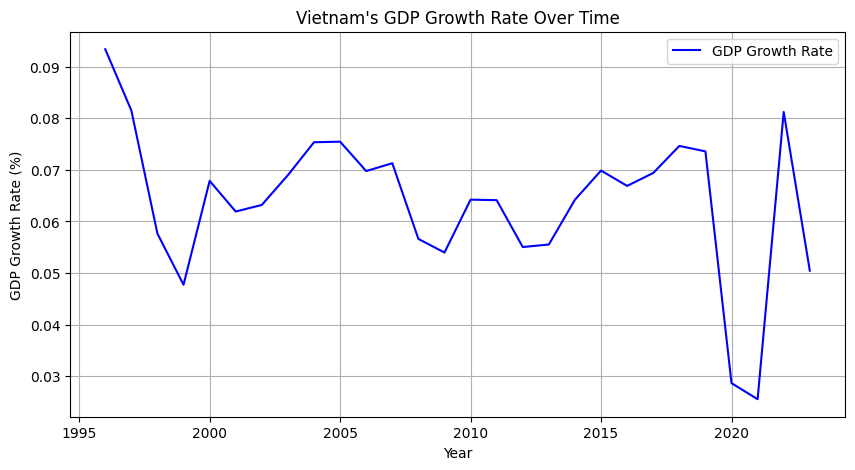

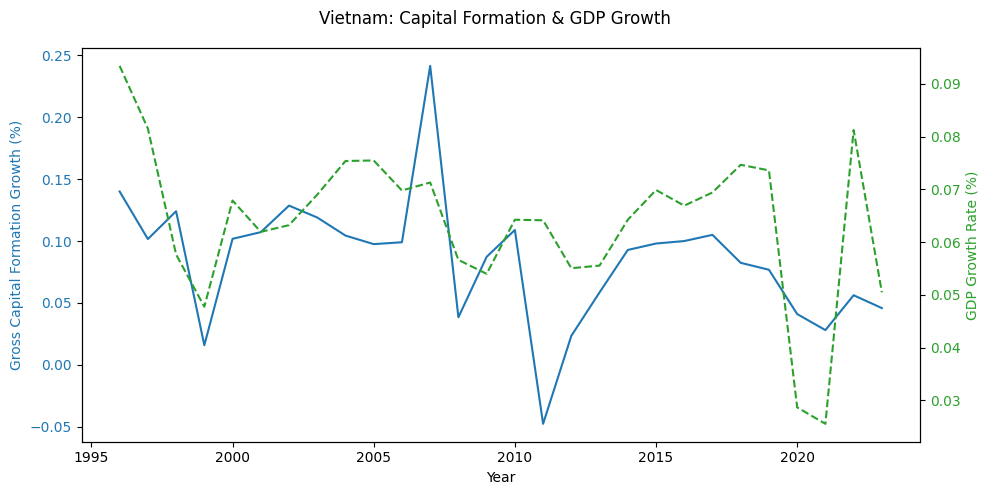

In [14]:
# Load Vietnam's economic data
data = pd.read_csv("data.csv")

# Convert Year column to integer
data["Year"] = data["Year"].astype(int)

# Plot GDP Growth Rate
plt.figure(figsize=(10,5))
plt.plot(data["Year"], data["GDP growth rate (%)"], linestyle='-', color='b', label="GDP Growth Rate")#
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Vietnam's GDP Growth Rate Over Time")
plt.legend()
plt.grid()
plt.show()

# Plot Capital Formation & GDP Growth
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Year")
ax1.set_ylabel("Gross Capital Formation Growth (%)", color="tab:blue")
ax1.plot(data["Year"], data["Gross capital formation growth (%)"], linestyle="-", color="tab:blue", label="Capital Formation Growth")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("GDP Growth Rate (%)", color="tab:green")
ax2.plot(data["Year"], data["GDP growth rate (%)"], linestyle="--", color="tab:green", label="GDP Growth Rate")
ax2.tick_params(axis="y", labelcolor="tab:green")

fig.suptitle("Vietnam: Capital Formation & GDP Growth")
fig.tight_layout()
plt.show()
